# 0. Import all the dependencies for the project

In [1]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Bring the data down
Download the data and process it with pandas

In [2]:
# The .csv is readed and putted into a DataFrame
df = pd.read_csv('gmedata.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [3]:
# The column date is transformed to a datetime to make a better 
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume
0,2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
1,2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2,2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
3,2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
4,2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [4]:
# Check types of date in the DataFrma
df.shape

(251, 6)

In [5]:
# We set the index as the date and replace the column
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


# 2. Creation of the environment

In [6]:
env = gym.make('stocks-v0', df=df, frame_bound=(10,110), window_size=10)
print("observation_space:", env.observation_space)

observation_space: Box(-10000000000.0, 10000000000.0, (10, 2), float32)


In [7]:
# Check attributes in the environment
env.__dict__

{'_saved_kwargs': {'disable_render_order_enforcing': False},
 'env': <PassiveEnvChecker<StocksEnv<stocks-v0>>>,
 '_action_space': None,
 '_observation_space': None,
 '_reward_range': None,
 '_metadata': None,
 '_cached_spec': None,
 '_has_reset': False,
 '_disable_render_order_enforcing': False}

In [8]:
# signal_features: Extracted features over time. Used to create Gym observations.
env.unwrapped.signal_features

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

# 3. Build environment

In [9]:
env.observation_space

Box(-10000000000.0, 10000000000.0, (10, 2), float32)

info {'total_reward': 116.3500108718872, 'total_profit': 0.4136877746910015, 'position': <Positions.Short: 0>} 



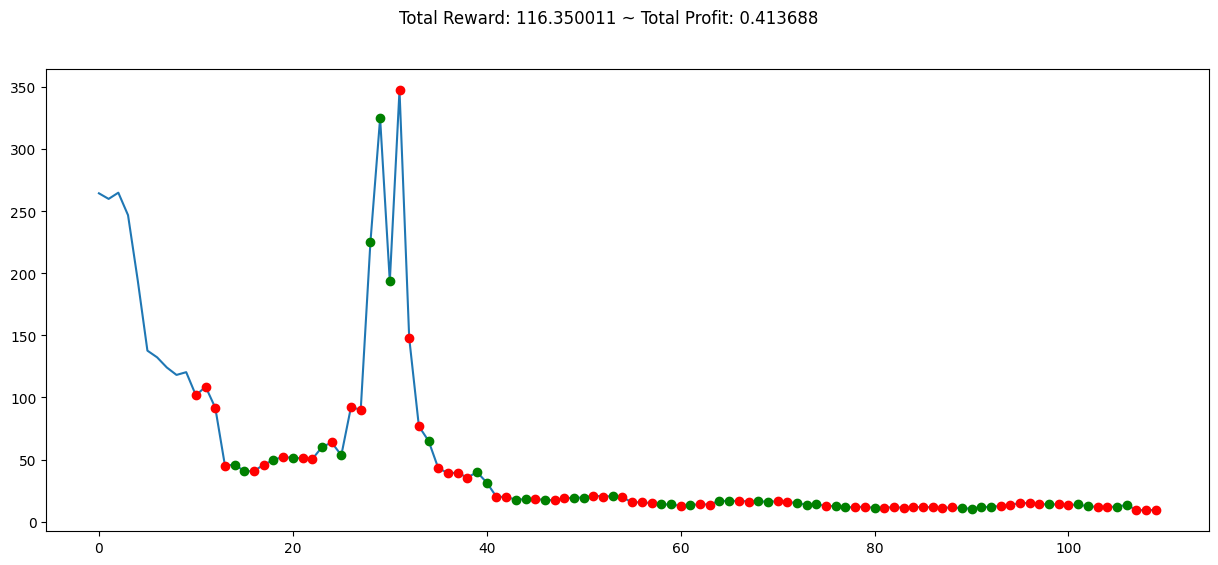

In [10]:
state = env.reset(seed=2808)
while True: 
    action = env.action_space.sample()
    n_state, reward, done,truncated, info = env.step(action)
    if done or truncated : 
        print('info', info,'\n')
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()

# 4. Train Environment

In [11]:
model = A2C('MlpPolicy', env, verbose=0) 
model.learn(total_timesteps=20000)

# 5. Test Environment

In [95]:
observation, info = env.reset()

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

print("info:", info)

info: {'total_reward': 370.17999267578125, 'total_profit': 0.6317673867965652, 'position': <Positions.Long: 1>}


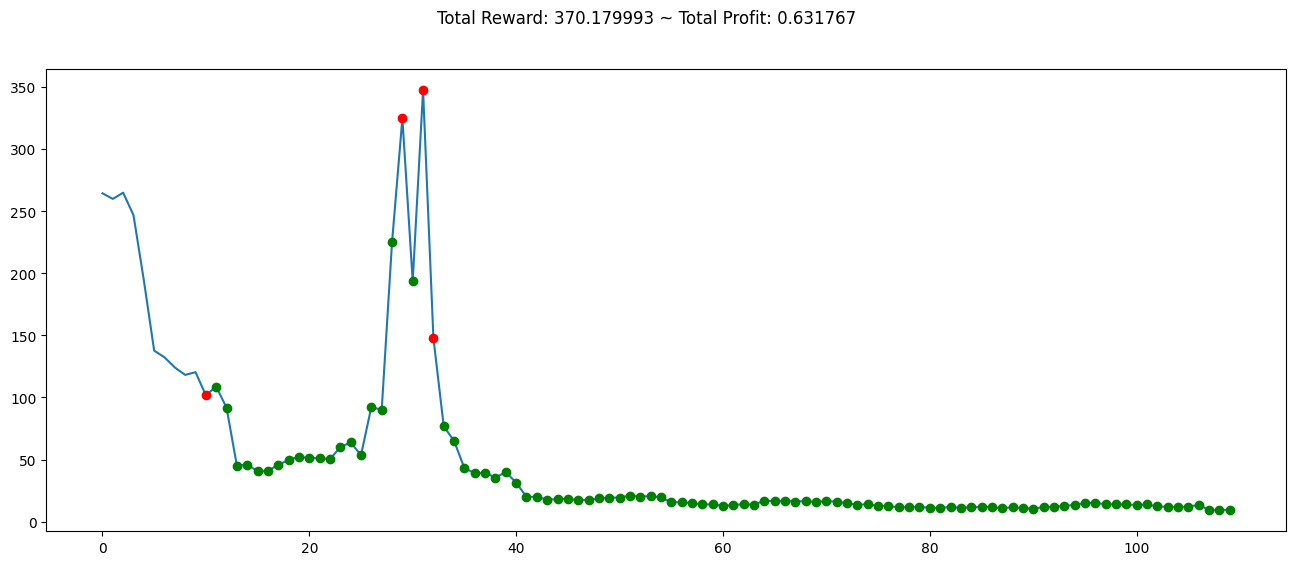

In [96]:
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()
plt.show()

In [87]:
observation

array([[ 9.39, -0.07],
       [ 9.77,  0.38],
       [10.2 ,  0.43],
       [10.35,  0.15],
       [10.09, -0.26],
       [10.02, -0.07],
       [ 9.14, -0.88],
       [10.04,  0.9 ],
       [10.56,  0.52],
       [ 8.75, -1.81]], dtype=float32)